In [1]:
# Dependence Libs: netcdf4
# dot nc file generator python implement
# the generator need to be modified, the python version is different to c++ version.
import netCDF4 as nc
import numpy as np

In [3]:
# file path
test_file_path = r'data/start_vel.nc'
data_set = ds = nc.Dataset(test_file_path)
print(data_set)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.3
    dimensions(sizes): nbound(2), Northing(3), Easting(162), Depth(25)
    variables(dimensions): int32 nbound(nbound), float64 Northing(Northing), float64 Northing_bnds(Northing, nbound), float64 Northing_Origin(), float64 Easting(Easting), float64 Easting_bnds(Easting, nbound), float64 Easting_Origin(), float64 Depth(Depth), float64 Depth_bnds(Depth, nbound), float64 Depth_Origin(), float64 Slowness(Depth, Easting, Northing)
    groups: 


In [4]:
print(ds.__dict__)

{'Conventions': 'CF-1.3'}


In [5]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'nbound', size = 2
<class 'netCDF4._netCDF4.Dimension'>: name = 'Northing', size = 3
<class 'netCDF4._netCDF4.Dimension'>: name = 'Easting', size = 162
<class 'netCDF4._netCDF4.Dimension'>: name = 'Depth', size = 25


In [6]:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int32 nbound(nbound)
    long_name: Boundary index variable
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of -2147483647 used
<class 'netCDF4._netCDF4.Variable'>
float64 Northing(Northing)
    units: m
    long_name: Northing coordinate
    bounds: Northing_bnds
unlimited dimensions: 
current shape = (3,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 Northing_bnds(Northing, nbound)
    units: m
unlimited dimensions: 
current shape = (3, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 Northing_Origin()
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 Easting(Easting)
    units: m
    long_name: Easting coordinate
    bounds: Easting_bnds
unlimited dimensions: 
current shape = (162,)
filling on, default _FillVa

In [9]:
# parameters
northing_cell = 3
easting_cell = 162
depth_cell = 25
interval = 0.2
nbound_val = 2

min_vel = 150
max_vel = 1100

filename = 'test_mdoel_seis.nc'

In [10]:
nc_file = nc.Dataset(filename, mode='w', format='NETCDF4_CLASSIC')
print(nc_file)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    dimensions(sizes): 
    variables(dimensions): 
    groups: 


In [11]:
# What is Easting_bnds?
ds['Easting_bnds'][:]

masked_array(
  data=[[ 0. ,  0.2],
        [ 0.2,  0.4],
        [ 0.4,  0.6],
        [ 0.6,  0.8],
        [ 0.8,  1. ],
        [ 1. ,  1.2],
        [ 1.2,  1.4],
        [ 1.4,  1.6],
        [ 1.6,  1.8],
        [ 1.8,  2. ],
        [ 2. ,  2.2],
        [ 2.2,  2.4],
        [ 2.4,  2.6],
        [ 2.6,  2.8],
        [ 2.8,  3. ],
        [ 3. ,  3.2],
        [ 3.2,  3.4],
        [ 3.4,  3.6],
        [ 3.6,  3.8],
        [ 3.8,  4. ],
        [ 4. ,  4.2],
        [ 4.2,  4.4],
        [ 4.4,  4.6],
        [ 4.6,  4.8],
        [ 4.8,  5. ],
        [ 5. ,  5.2],
        [ 5.2,  5.4],
        [ 5.4,  5.6],
        [ 5.6,  5.8],
        [ 5.8,  6. ],
        [ 6. ,  6.2],
        [ 6.2,  6.4],
        [ 6.4,  6.6],
        [ 6.6,  6.8],
        [ 6.8,  7. ],
        [ 7. ,  7.2],
        [ 7.2,  7.4],
        [ 7.4,  7.6],
        [ 7.6,  7.8],
        [ 7.8,  8. ],
        [ 8. ,  8.2],
        [ 8.2,  8.4],
        [ 8.4,  8.6],
        [ 8.6,  8.8],
        [ 8.8,  9.

In [12]:
# What is nbound?
ds['nbound'][:]

masked_array(data=[1, 2],
             mask=False,
       fill_value=999999,
            dtype=int32)

The original nc file has dimensions:
**<class 'netCDF4._netCDF4.Dimension'>: name = 'nbound', size = 2**
**<class 'netCDF4._netCDF4.Dimension'>: name = 'Northing', size = 3**
**<class 'netCDF4._netCDF4.Dimension'>: name = 'Easting', size = 162**
**<class 'netCDF4._netCDF4.Dimension'>: name = 'Depth', size = 25**


In [13]:
# Create dimensions
nc_file.createDimension('nbound',size = nbound_val)
nc_file.createDimension('Northing', size = northing_cell)
nc_file.createDimension('Easting', size = easting_cell)
nc_file.createDimension('Depth', size = depth_cell)
# test dimension
for dim in nc_file.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'nbound', size = 2
<class 'netCDF4._netCDF4.Dimension'>: name = 'Northing', size = 3
<class 'netCDF4._netCDF4.Dimension'>: name = 'Easting', size = 162
<class 'netCDF4._netCDF4.Dimension'>: name = 'Depth', size = 25


Creating variables:
There're values called

nbound
Northing
Northing_bnds
Northing_Origin
Easting
Easting_bnds
Easting_Origin
Depth
Depth_bnds
Depth_Origin
Slowness

HERE.

In [14]:
# Create vars

# nbound, int32
nbound = nc_file.createVariable('nbound', np.int32, ('nbound',))
# others, float 64
Northing = nc_file.createVariable('Northing', np.float64, ('Northing', ))
Easting = nc_file.createVariable('Easting', np.float64, ('Easting', ))
Depth = nc_file.createVariable('Depth', np.float64, ('Depth', ))
 # bnds
Northing_bnds = nc_file.createVariable('Northing_bnds', np.float64, ('Northing', 'nbound'))
Easting_bnds = nc_file.createVariable('Easting_bnds', np.float64, ('Easting', 'nbound'))
Depth_bnds = nc_file.createVariable('Depth_bnds', np.float64, ('Depth', 'nbound'))
 # Origins
Northing_Origin = nc_file.createVariable('Northing_Origin', np.float64, ())
Easting_Origin = nc_file.createVariable('Easting_Origin', np.float64, ())
Depth_Origin = nc_file.createVariable('Depth_Origin', np.float64, ())
 # slowness
Slowness = nc_file.createVariable('Slowness', np.float64, ('Depth', 'Easting', 'Northing'))

In [15]:
# test nc file:
for var in ds.variables.values():
    print(var)

<class 'netCDF4._netCDF4.Variable'>
int32 nbound(nbound)
    long_name: Boundary index variable
unlimited dimensions: 
current shape = (2,)
filling on, default _FillValue of -2147483647 used
<class 'netCDF4._netCDF4.Variable'>
float64 Northing(Northing)
    units: m
    long_name: Northing coordinate
    bounds: Northing_bnds
unlimited dimensions: 
current shape = (3,)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 Northing_bnds(Northing, nbound)
    units: m
unlimited dimensions: 
current shape = (3, 2)
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 Northing_Origin()
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used
<class 'netCDF4._netCDF4.Variable'>
float64 Easting(Easting)
    units: m
    long_name: Easting coordinate
    bounds: Easting_bnds
unlimited dimensions: 
current shape = (162,)
filling on, default _FillVa

In [16]:
# writing data:
# Depth, Northing, Easting data
Depth[:] = np.arange(interval, interval * (depth_cell+1e-9), interval)
nbound[:] = np.arange(1, nbound_val + 1e-9)
Northing[:] = np.arange(interval, interval * (northing_cell+1e-9), interval)
Easting[:] = np.arange(interval, interval * (easting_cell + 1e-9), interval)

In [17]:
# Check data
nc_file['Northing'][:]

masked_array(data=[0.2, 0.4, 0.6],
             mask=False,
       fill_value=1e+20)

In [18]:
# Check data
ds['Northing'][:]

masked_array(data=[0.2, 0.4, 0.6],
             mask=False,
       fill_value=1e+20)

In [19]:
# writing bnds data
print(ds['Northing_bnds'][:])
## init ndarray
Northing_bnds_data = np.zeros([northing_cell, nbound_val])
Easting_bnds_data = np.zeros([easting_cell, nbound_val])
Depth_bnds_data = np.zeros([depth_cell, nbound_val])

## gen value using loop
for nbound_iter in range(nbound_val):
    for northing_iter in range(northing_cell):
        Northing_bnds_data[northing_iter, nbound_iter] = interval * (northing_iter + nbound_iter)

for nbound_iter in range(nbound_val):
    for easting_iter in range(easting_cell):
        Easting_bnds_data[easting_iter, nbound_iter] = interval * (easting_iter + nbound_iter)

for nbound_iter in range(nbound_val):
    for depth_iter in range(depth_cell):
        Depth_bnds_data[depth_iter, nbound_iter] = interval * (depth_iter + nbound_iter)

Northing_bnds[:,:] = Northing_bnds_data
Easting_bnds[:,:] = Easting_bnds_data
Depth_bnds[:, :] = Depth_bnds_data

[[0.  0.2]
 [0.2 0.4]
 [0.4 0.6]]


In [20]:
# Gen Slowness
##

In [21]:

np.shape(ds['Slowness'][:])

(25, 162, 3)

In [22]:
# write the slowness data
## generate vel matrix
vel_data_set = np.load("dataset.npz")
depth = vel_data_set['depth'] # n=unit: cm
seis = vel_data_set['seis']
cluster_data = vel_data_set['cluster']
# depth to SI unit
depth = depth / 100
depth
depth_seis_attri = np.polyfit(np.log(depth), seis, 1)

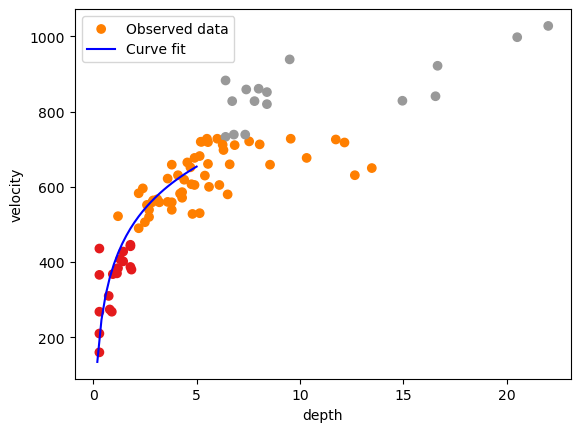

In [23]:
depth_axis = np.arange(interval, interval * (depth_cell+1e-9), interval)
seis_vel_axis = np.log(depth_axis) * depth_seis_attri[0] + depth_seis_attri[1]

import matplotlib.pyplot as plt
plt.figure()
plt.scatter(depth, seis, c=cluster_data, cmap=plt.cm.Set1)
plt.xlabel("depth")
plt.ylabel("velocity")
plt.plot(depth_axis,  seis_vel_axis, 'b')
plt.legend(["Observed data", "Curve fit"])
plt.show()

In [24]:
# convert seis_vel_axis to slowness axis
seis_slowness_axis = 1/seis_vel_axis
print(seis_slowness_axis)

[0.00743591 0.00405948 0.00320752 0.00279181 0.00253678 0.0023606
 0.00222967 0.00212745 0.00204477 0.00197607 0.00191779 0.0018675
 0.00182351 0.00178459 0.00174983 0.00171851 0.00169009 0.00166415
 0.00164034 0.00161836 0.001598   0.00157906 0.00156137 0.00154481
 0.00152924]


In [25]:
# create 3d array to store slowness array
slowness_data = np.ones([depth_cell, easting_cell, northing_cell])
print(np.shape(slowness_data))
print(np.shape(ds['Slowness'][:]))

(25, 162, 3)
(25, 162, 3)


In [26]:
# using a loop to write data
for depth_iter in range(depth_cell):
    slowness_data[depth_iter, :, :] = slowness_data[depth_iter, :, :] * seis_slowness_axis[depth_iter]
Slowness[:,:,:] = slowness_data

In [27]:
print(np.shape(ds['Slowness'][:]))
print(np.shape(nc_file['Slowness'][:]))

(25, 162, 3)
(25, 162, 3)


In [28]:
print(ds['Slowness'][:,1,:])
print(nc_file['Slowness'][:,2,:])

[[0.01       0.01       0.01      ]
 [0.00774194 0.00774194 0.00774194]
 [0.00631579 0.00631579 0.00631579]
 [0.00533333 0.00533333 0.00533333]
 [0.00461538 0.00461538 0.00461538]
 [0.0040678  0.0040678  0.0040678 ]
 [0.00363636 0.00363636 0.00363636]
 [0.00328767 0.00328767 0.00328767]
 [0.003      0.003      0.003     ]
 [0.00275862 0.00275862 0.00275862]
 [0.00255319 0.00255319 0.00255319]
 [0.00237624 0.00237624 0.00237624]
 [0.00222222 0.00222222 0.00222222]
 [0.00208696 0.00208696 0.00208696]
 [0.00196721 0.00196721 0.00196721]
 [0.00186047 0.00186047 0.00186047]
 [0.00176471 0.00176471 0.00176471]
 [0.00167832 0.00167832 0.00167832]
 [0.0016     0.0016     0.0016    ]
 [0.00152866 0.00152866 0.00152866]
 [0.00146341 0.00146341 0.00146341]
 [0.00140351 0.00140351 0.00140351]
 [0.00134831 0.00134831 0.00134831]
 [0.0012973  0.0012973  0.0012973 ]
 [0.00125    0.00125    0.00125   ]]
[[0.00743591 0.00743591 0.00743591]
 [0.00405948 0.00405948 0.00405948]
 [0.00320752 0.00320752 0.0

In [29]:
nc_file.close()